# Atividade 03 - Parte 01: Modelagem de Dispersão

Alunas: Ana Julia Pietroski e Bárbara Girardi.

Nesta atividade será implementado um modelo gaussiano seguindo determinados tópicos que serão apresentados a seguir. 

#### 1. Implementar uma função para determinar a classe de estabilidade de Pasquil para diferentes condições atmosféricas.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath +'\\inputs\\meteoSuperficie'
print(metSuperficiePath)

ezAermetPath = rootPath + '\\inputs\\ezAermet'
print(ezAermetPath) 

#Listando os arquivos dentro do diretório
files = os.listdir(ezAermetPath)
print(files)

C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara
C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara\inputs\meteoSuperficie
C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara\inputs\ezAermet
['meteo.csv']


In [58]:
df = pd.read_csv('C:\\Users\\Acer\\Desktop\\ENS5173_Barbara\\ENS5173_Barbara\\inputs\\ezAermet\\METEO.csv')
df

,year,month,day,Julian day,hour,sensible,surface,convective,potential,mixing height,...,anemometer height,temperature,measurement height,precipitation,precipitation amount,relative humidity,station pressure (mb),cloud cover,wind speed.1,cloud cover.1
0,2023,1,1,1,1,-50.0,0.571,-9.0,-9.0,-999,...,14,298.1,2,0,0,83,1010,6,NAD-SFC,NoSubs
1,2023,1,1,1,2,-47.7,0.545,-9.0,-9.0,-999,...,14,298.1,2,0,0,83,1010,6,NAD-SFC,NoSubs
2,2023,1,1,1,3,-54.4,0.622,-9.0,-9.0,-999,...,14,298.1,2,0,0,83,1010,6,NAD-SFC,NoSubs
3,2023,1,1,1,4,-61.1,0.699,-9.0,-9.0,-999,...,14,298.1,2,0,0,83,1010,6,NAD-SFC,NoSubs
4,2023,1,1,1,5,-25.3,0.290,-9.0,-9.0,-999,...,14,298.1,2,0,0,89,1010,6,NAD-SFC,NoSubs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023,12,31,365,20,-43.5,0.496,-9.0,-9.0,-999,...,14,297.1,2,0,0,69,1010,6,NAD-SFC,NoSubs
8756,2023,12,31,365,21,-13.9,0.160,-9.0,-9.0,-999,...,14,297.1,2,0,0,69,1010,6,NAD-SFC,NoSubs
8757,2023,12,31,365,22,-11.4,0.140,-9.0,-9.0,-999,...,14,296.1,2,0,0,78,1010,6,NAD-SFC,NoSubs
8758,2023,12,31,365,23,-999.0,-9.000,-9.0,-9.0,-999,...,-9,296.1,2,9999,-9,999,915,6,NAD,Sub_CC-TT


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Função para determinar a classe de estabilidade atmosférica
def definir_classe_estabilidade(linha):
    cobertura_nuvens = linha['cloud cover ']
    velocidade_vento = linha['wind speed ']
    fluxo_calor_sensivel = linha['sensible']
    
    if fluxo_calor_sensivel > 10:
        insolacao = 'forte'
    elif 3 < fluxo_calor_sensivel <= 10:
        insolacao = 'moderada'
    else:
        insolacao = 'fraca'

    if cobertura_nuvens < 3:
        if velocidade_vento < 2:
            return 'A' if insolacao == 'forte' else 'B'
        elif 2 <= velocidade_vento < 3:
            return 'B' if insolacao == 'forte' else 'C'
        else:
            return 'C'
    elif 3 <= cobertura_nuvens < 7:
        if velocidade_vento < 2:
            return 'B' if insolacao == 'forte' else 'C'
        elif 2 <= velocidade_vento < 5:
            return 'C'
        else:
            return 'D'
    else:
        if velocidade_vento < 2:
            return 'C'
        elif 2 <= velocidade_vento < 5:
            return 'D'
        else:
            return 'E'

#### 2. Implementar a função de estimativa de coefiente de dispersão (sigmaYZ) para todas as classes de estabilidade.


In [77]:
#Criando função da estimativa da dispersão lateral e vertical da pluma

def sigmaYZ(x, classe, urbOrRural):
    if urbOrRural == 'urbano':
        if classe in ['A', 'B']:
            sigmaY = 0.32 * x * (1 + 0.0004 * x)**(-0.5)
            sigmaZ = 0.24 * x * (1 + 0.001 * x)**(0.5)
        elif classe == 'C':
            sigmaY = 0.22 * x * (1 + 0.0004 * x)**(-0.5)
            sigmaZ = 0.20 * x
        elif classe == 'D':
            sigmaY = 0.16 * x * (1 + 0.0004 * x)**(-0.5)
            sigmaZ = 0.14 * x * (1 + 0.0003 * x)**(-0.5)
        elif classe in ['E', 'F']:
            sigmaY = 0.11 * x * (1 + 0.0004 * x)**(-0.5)
            sigmaZ = 0.08 * x * (1 + 0.0015 * x)**(-0.5)
        else:
            print('Classe de estabilidade errada')
    elif urbOrRural == 'rural':
        if classe == 'A':
            sigmaY = 0.22 * x * (1 + 0.0001 * x)**(-0.5)
            sigmaZ = 0.20 * x
        elif classe == 'B':
            sigmaY = 0.16 * x * (1 + 0.0001 * x)**(-0.5)
            sigmaZ = 0.12 * x
        elif classe == 'C':
            sigmaY = 0.11 * x * (1 + 0.0001 * x)**(-0.5)
            sigmaZ = 0.08 * x * (1 + 0.0002 * x)**(-0.5)
        elif classe == 'D':
            sigmaY = 0.08 * x * (1 + 0.0001 * x)**(-0.5)
            sigmaZ = 0.06 * x * (1 + 0.0015 * x)**(-0.5)
        elif classe == 'E':
            sigmaY = 0.06 * x * (1 + 0.0001 * x)**(-0.5)
            sigmaZ = 0.03 * x * (1 + 0.0003 * x)**(-1)
        elif classe == 'F':
            sigmaY = 0.04 * x * (1 + 0.0001 * x)**(-0.5)
            sigmaZ = 0.016 * x * (1 + 0.0003 * x)**(-1)
        else:
            print('Classe de estabilidade errada')
            sigmaY, sigmaZ = np.nan, np.nan
    else:
        print('Tipo urbano/rural não reconhecido')
        sigmaY, sigmaZ = np.nan, np.nan
    return sigmaY, sigmaZ

#### 3. Implementar a função de estimativa de sobrelevação da pluma utilizando os métodos de Davidson-Bryant, Holland e Briggs. Deve ser considerado o efeito Tip-Downwash

3.1 Davidson-Bryant

In [78]:
# Função para estimar o deltaH com base na equação de Davidson-Bryant

def DavidsonBryant(d, vs, u, Ts, Tamb):
    deltaH_DavidsonBryant = (d*(vs/u)**(1.4))*(1+(Ts-Tamb)/Ts)
    return DavidsonBryant

3.2 Holland

In [79]:
# Função para estimar o deltaH com base na equação de Holland

def Holland(vs, d, u, p, Ts, Tamb):
    deltaH_Holland = (vs*d/u)*(1.5+(2.68*10**-3)*(p*((Ts-Tamb)/Ts)*d))
    return Holland

3.3 Briggs

In [91]:
#VERIFICAR SE SERIA ISSO MESMO, NAO TEM EQUACAO NOS SLIDES
def Briggs(vs, d, u, p, Ts, Tamb):
    deltaH_Briggs = (vs*d/u)*((1+2.68*10**-3*(p*((Ts-Tamb)/Ts)*d))/(1+0.5*((Ts-Tamb)/Ts)))
    return Briggs

#### 4. Implementar a função do modelo gaussiano

Digite a classe de estabilidade de Pasquill (A-F):  C
Digite a velocidade do vento em m/s:  4


Classe de estabilidade de Pasquill: C
Sobrelevação da pluma (deltaH): 3.039734180752952
Altura efetiva da chaminé (H_eff): 103.03973418075296
Erro: Valores de sigmaY (0.0), sigmaZ (0.0) ou u (4.0) são não positivos.


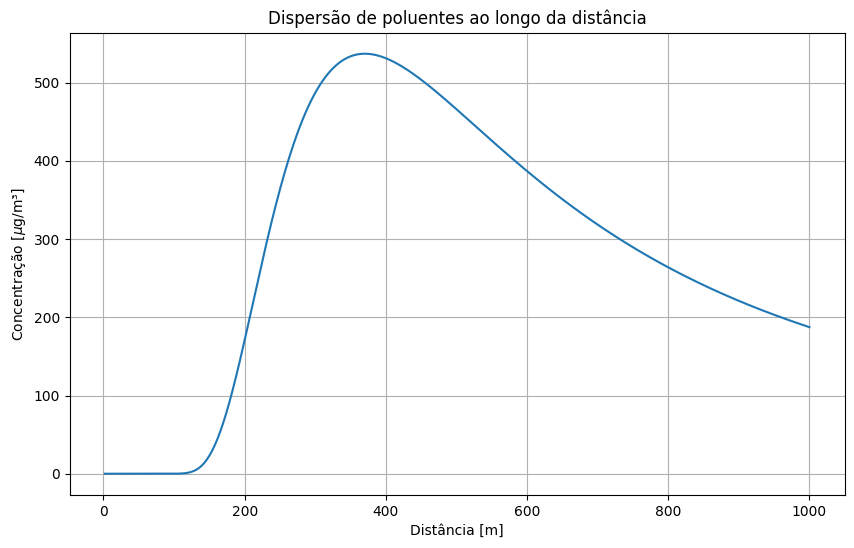

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Função para o modelo Gaussiano de dispersão
def modeloGaussiano(qs, sigmaY, sigmaZ, u, y, z, H, x):
    conc = np.zeros_like(x)
    for i, dist in enumerate(x):
        if sigmaY[i] <= 0 or sigmaZ[i] <= 0 or u <= 0:
            print(f"Erro: Valores de sigmaY ({sigmaY[i]}), sigmaZ ({sigmaZ[i]}) ou u ({u}) são não positivos.")
            conc[i] = np.nan
            continue
        termo1 = qs / (2 * np.pi * sigmaY[i] * sigmaZ[i] * u)
        termo2 = np.exp((-y**2) / (2 * sigmaY[i]**2))
        termo3 = np.exp((-(z - H)**2) / (2 * sigmaZ[i]**2)) + np.exp((-(z + H)**2) / (2 * sigmaZ[i]**2))
        conc[i] = termo1 * termo2 * termo3
    conc *= 10**6  # Convertendo para µg/m³
    return conc

# Parâmetros adicionais para a simulação
d = 2.5  # Diâmetro interno da chaminé em metros
Vs = 20  # Velocidade do efluente na saída da chaminé em m/s
p = 1013  # Pressão atmosférica em milibares
deltaT = 60  # Diferença de temperatura entre o gás na chaminé e a temperatura ambiente em K
Ts = 533  # Temperatura do gás na saída da chaminé em K
Fb = 1000  # Parâmetro de empuxo
tipo_atmosfera = 'quente'  # ou 'frio'
H = 100  # Altura da chaminé

# Função para calcular sigmaY e sigmaZ
def sigmaYZ(x, classe, urbOrRural):
    if urbOrRural == 'urbano':
        if classe in ['A', 'B']:
            sigmaY = 0.32 * x * (1 + 0.0004 * x)**(-0.5)
            sigmaZ = 0.24 * x * (1 + 0.001 * x)**0.5
        elif classe == 'C':
            sigmaY = 0.22 * x * (1 + 0.0004 * x)**(-0.5)
            sigmaZ = 0.20 * x
        elif classe == 'D':
            sigmaY = 0.16 * x * (1 + 0.0004 * x)**(-0.5)
            sigmaZ = 0.14 * x * (1 + 0.0003 * x)**(-0.5)
        elif classe in ['E', 'F']:
            sigmaY = 0.11 * x * (1 + 0.0004 * x)**(-0.5)
            sigmaZ = 0.08 * x * (1 + 0.0015 * x)**(-0.5)
        else:
            raise ValueError('Classe de estabilidade errada')
    elif urbOrRural == 'rural':
        if classe == 'A':
            sigmaY = 0.22 * x * (1 + 0.0001 * x)**(-0.5)
            sigmaZ = 0.20 * x
        elif classe == 'B':
            sigmaY = 0.16 * x * (1 + 0.0001 * x)**(-0.5)
            sigmaZ = 0.12 * x
        elif classe == 'C':
            sigmaY = 0.11 * x * (1 + 0.0001 * x)**(-0.5)
            sigmaZ = 0.08 * x * (1 + 0.0002 * x)**(-0.5)
        elif classe == 'D':
            sigmaY = 0.08 * x * (1 + 0.0001 * x)**(-0.5)
            sigmaZ = 0.06 * x * (1 + 0.0015 * x)**(-0.5)
        elif classe == 'E':
            sigmaY = 0.06 * x * (1 + 0.0001 * x)**(-0.5)
            sigmaZ = 0.03 * x * (1 + 0.0003 * x)**(-1)
        elif classe == 'F':
            sigmaY = 0.04 * x * (1 + 0.0001 * x)**(-0.5)
            sigmaZ = 0.016 * x * (1 + 0.0003 * x)**(-1)
        else:
            raise ValueError('Classe de estabilidade errada')
    else:
        raise ValueError('Tipo urbano/rural não reconhecido')
    return sigmaY, sigmaZ

# Cálculo da sobrelevação da pluma (simples)
def sobrelevacaoBriggs(Vs, d, u, deltaT, Ts, H):
    if deltaT > 0:
        deltaH_Briggs = 1.6 * (Vs * d / u)**0.6 * (deltaT / Ts)**0.4
    else:
        deltaH_Briggs = 0.0
    return deltaH_Briggs

# Entrada do usuário para a classe de estabilidade e velocidade do vento
classe = input("Digite a classe de estabilidade de Pasquill (A-F): ").strip().upper()
velocidade_vento = float(input("Digite a velocidade do vento em m/s: ").strip())

print("Classe de estabilidade de Pasquill:", classe)

# Estimativa dos coeficientes de dispersão sigmaY e sigmaZ
x = np.linspace(0, 1000, 500)  # Distâncias de 0 a 1000 m
urbOrRural = 'urbano'  # ou 'rural', exemplo
sigmaY, sigmaZ = sigmaYZ(x, classe, urbOrRural)

deltaH = sobrelevacaoBriggs(Vs, d, velocidade_vento, deltaT, Ts, H)
H_eff = H + deltaH
print("Sobrelevação da pluma (deltaH):", deltaH)
print("Altura efetiva da chaminé (H_eff):", H_eff)

# Cálculo da concentração de poluentes
qs = 100  # Taxa de emissão em g/s
y = 0  # Para ser na direção do vento, usa y = 0
z = 1.5  # Altura média do nariz
conc = modeloGaussiano(qs, sigmaY, sigmaZ, velocidade_vento, y, z, H_eff, x)

# Visualização dos resultados
plt.figure(figsize=(10, 6))
plt.plot(x, conc)
plt.xlabel('Distância [m]')
plt.ylabel('Concentração [$\mu$g/m³]')
plt.title('Dispersão de poluentes ao longo da distância')
plt.grid(True)
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_1756\3698200010.py:14: RuntimeWarning: divide by zero encountered in divide
  termo1 = qs / (2 * np.pi * sigmaY * sigmaZ * u)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1756\3698200010.py:15: RuntimeWarning: divide by zero encountered in divide
  termo2 = np.exp((-y**2) / (2 * sigmaY**2))
C:\Users\Acer\AppData\Local\Temp\ipykernel_1756\3698200010.py:16: RuntimeWarning: divide by zero encountered in divide
  termo3 = np.exp((-(z - H)**2) / (2 * sigmaZ**2)) + np.exp((-(z + H)**2) / (2 * sigmaZ**2))
C:\Users\Acer\AppData\Local\Temp\ipykernel_1756\3698200010.py:17: RuntimeWarning: invalid value encountered in multiply
  conc = termo1 * termo2 * termo3


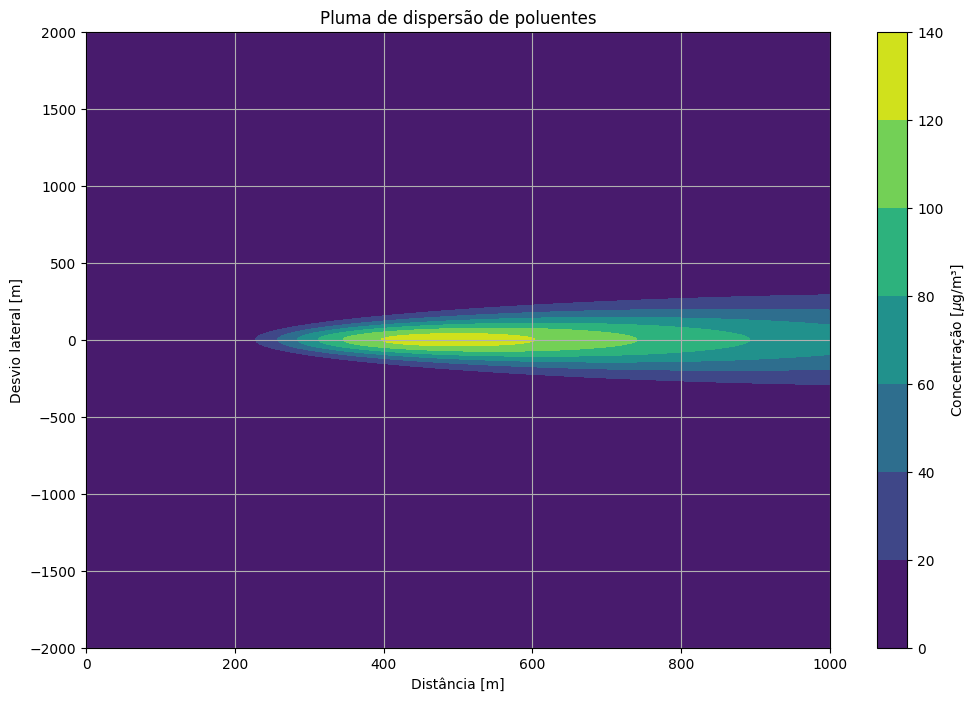

In [93]:
# Parâmetros da simulação
qs = 100  # Taxa de emissão em g/s
H = 100  # Altura da chaminé
d = 2.5  # Diâmetro interno da chaminé em metros
Vs = 20  # Velocidade do efluente na saída da chaminé em m/s
p = 1013  # Pressão atmosférica em milibares
deltaT = 60  # Diferença de temperatura entre o gás na chaminé e a temperatura ambiente em K
Ts = 533  # Temperatura do gás na saída da chaminé em K
u = 10  # Velocidade do vento
urbOrRural = 'urbano'  # Tipo de área
classe = 'C'  # Classe de estabilidade exemplo

def modeloGaussiano(qs, sigmaY, sigmaZ, u, y, z, H):
    termo1 = qs / (2 * np.pi * sigmaY * sigmaZ * u)
    termo2 = np.exp((-y**2) / (2 * sigmaY**2))
    termo3 = np.exp((-(z - H)**2) / (2 * sigmaZ**2)) + np.exp((-(z + H)**2) / (2 * sigmaZ**2))
    conc = termo1 * termo2 * termo3
    return conc * 10**6  # Convertendo para µg/m³

def sobrelevacaoBriggs(Vs, d, u, deltaT, Ts, H, tipo_atmosfera):
    if tipo_atmosfera == 'quente':
        deltaH = (Vs * d / u) * (1 + 2.68 * 10**-3 * (p * ((Ts - deltaT) / Ts) * d) / (1 + 0.5 * (deltaT / Ts)))
    elif tipo_atmosfera == 'frio':
        deltaH = (Vs * d / u) * (1 + 0.5 * deltaT / Ts)
    else:
        raise ValueError('Tipo de atmosfera não reconhecido')
    return deltaH

# Cálculo da sobrelevação da pluma
deltaH = sobrelevacaoBriggs(Vs, d, u, deltaT, Ts, H, 'quente')
H_eff = H + deltaH

# Definição do grid para o gráfico
x = np.linspace(0, 1000, 500)  # Distâncias de 0 a 1000 m
X, Y = np.meshgrid(x, np.linspace(-2000, 2000, 500))  # Ajuste do desvio lateral
sigmaY, sigmaZ = sigmaYZ(X, classe, urbOrRural)
conc2D = modeloGaussiano(qs, sigmaY, sigmaZ, u, Y, 1.5, H_eff)

# Criação do gráfico
fig, ax = plt.subplots(figsize=(12, 8))
contour = ax.contourf(X, Y, conc2D, cmap='viridis')
plt.colorbar(contour, label='Concentração [$\mu$g/m³]')
plt.xlabel('Distância [m]')
plt.ylabel('Desvio lateral [m]')
plt.title('Pluma de dispersão de poluentes')
plt.grid(True)
plt.show()